### 0. Install necessary packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### 1. Load 100 random location files from the folder

In [2]:
data_folder_path = "../data/2_LamaH-CE_daily/A_basins_total_upstrm/2_timeseries/daily"

# Choose 100 random files
np.random.seed(1234)
files = os.listdir(data_folder_path)
files = np.random.choice(files, 100, replace=False)

data = pd.DataFrame()

for file in files:
    file_data = pd.read_csv(os.path.join(data_folder_path, file), delimiter=";")
    file_data['location'] = file.split(".")[0]
    data = pd.concat([data, file_data], axis=0)
    
data.set_index(['location', 'YYYY', 'DOY'], inplace=True)   
data.head()


MM  DD  2m_temp_max  2m_temp_mean  2m_temp_min  \
location YYYY DOY                                                   
ID_825   1981 1     1   1          2.0          -0.5         -3.1   
              2     1   2         -0.7          -2.6         -3.7   
              3     1   3          2.8           1.4         -0.5   
              4     1   4          0.4          -0.7         -2.5   
              5     1   5         -2.6          -5.0         -6.6   

                   2m_dp_temp_max  2m_dp_temp_mean  2m_dp_temp_min  \
location YYYY DOY                                                    
ID_825   1981 1              -0.6             -3.3            -6.8   
              2              -1.6             -5.0            -6.8   
              3               1.2              0.3            -1.4   
              4              -1.2             -2.0            -3.5   
              5              -3.7             -6.6            -9.1   

                   10m_wind_u  10m_wind_v  ...    swe  surf_net_solar_rad_max  \
location YYYY DOY                          ...                                  
ID_825   1981 1           5.7         0.3  ...   6.28                     131   
              2           4.1        -0.4  ...   9.14                     142   
              3           5.6         0.9  ...  17.17                      60   
              4           4.0         0.0  ...  18.10                      88   
              5           2.1        -2.0  ...  20.18                      59   

                   surf_net_solar_rad_mean  surf_net_therm_rad_max  \
location YYYY DOY                                                    
ID_825   1981 1                         22                      75   
              2                         25                      76   
              3                         10                      53   
              4                         17                      72   
              5                         12                      71   

                   surf_net_therm_rad_mean  surf_press  total_et   prec  \
location YYYY DOY                                                         
ID_825   1981 1                         39     93077.0      0.82   4.69   
              2                         39     93273.0      0.32   6.14   
              3                         12     91853.0      0.18  14.38   
              4                         38     91827.0      0.27   4.47   
              5                         36     92530.0      0.13   1.93   

                   volsw_123  volsw_4  
location YYYY DOY                      
ID_825   1981 1         0.40     0.39  
              2         0.39     0.39  
              3         0.39     0.39  
              4         0.40     0.39  
              5         0.40     0.39  

[5 rows x 23 columns]

### 2. Null Value Analysis

For this analysis we will first look for NaN or NULL values and afterwards for values equal to 0, which could also potentially indicate data errors.

In [3]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [4]:
zero_values = (data == 0).sum()
zero_values[zero_values > 0]

2m_temp_max                  4114
2m_temp_mean                 5747
2m_temp_min                  6877
2m_dp_temp_max               6062
2m_dp_temp_mean              6426
2m_dp_temp_min               5965
10m_wind_u                  78934
10m_wind_v                  63665
swe                        638424
surf_net_solar_rad_mean         1
surf_net_therm_rad_max        112
surf_net_therm_rad_mean      1653
total_et                    32016
prec                       278359
dtype: int64

There are no missing values in the data, but there is a significant amount of values equal to 0. We need to check wether they occur naturally, like in "prec" as there are of course many days without precipitation, or they are misleading values. We can do this by looking at the distribution of the variables and by checking if there are very long periods with continously 0 values, which could indicate an error in data generation or collection.

<Axes: >

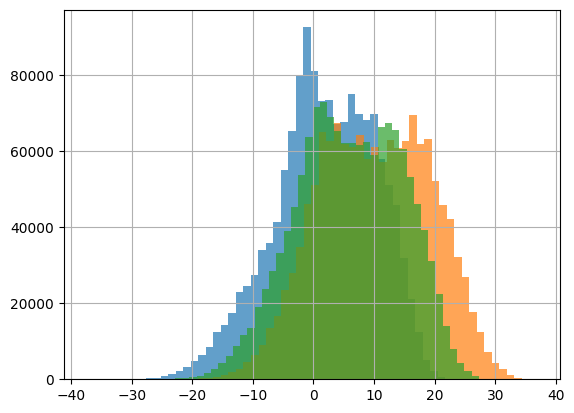

In [5]:
data['2m_temp_min'].hist(bins=50, alpha=0.7)
data['2m_temp_max'].hist(bins=50, alpha=0.7)
data['2m_temp_mean'].hist(bins=50, alpha=0.7)

# data['2m_dp_temp_min'].hist(bins=50, alpha=0.7)
# data['2m_dp_temp_max'].hist(bins=50, alpha=0.7)
# data['2m_dp_temp_mean'].hist(bins=50, alpha=0.7)

# data['10m_wind_u'].hist(bins=50, alpha=0.7)
# data['10m_wind_v'].hist(bins=50, alpha=0.7)

# data['surf_net_therm_rad_max'].hist(bins=50, alpha=0.7)
# data['surf_net_therm_rad_mean'].hist(bins=50, alpha=0.7)

# data['prec'].hist(bins=50, alpha=0.7)


For all the above visualized attributes (also those which are commented out), the 0 values do not stand out of the distribution. We therefore conclude that the values occur naturally and are not indicating errors in the data. This assumption also aligns with the meaning of the data attributes, where 0 values are typically present in a natural environment.

<Axes: >

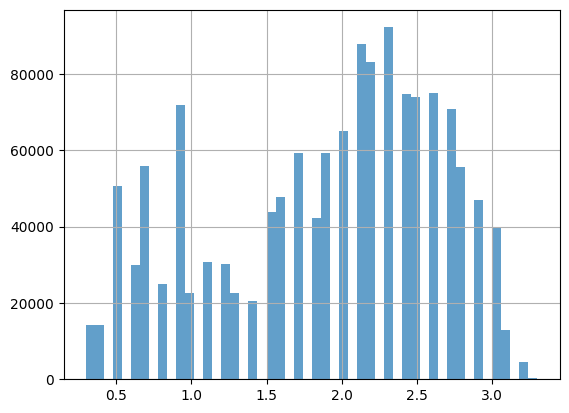

In [6]:
data['lai_low_veg'].hist(bins=50, alpha=0.7)


The data attribute "lai_low_veg" represents the Leaf Area Index (LAI) of low vegetation. In natural environments, especially in regions with seasonal vegetation or during certain times of the year when low vegetation is not present or has shed its leaves, it is possible to have periods where the LAI is zero. Therefore, 0 values in the "lai_low_veg" attribute can be expected and are not necessarily indicative of data errors.

<Axes: >

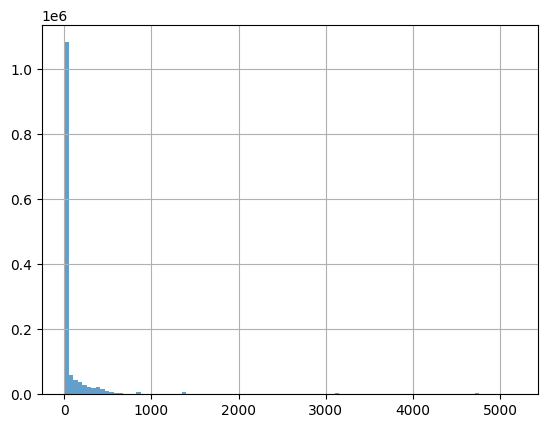

In [7]:
data['swe'].hist(bins=100, alpha=0.7)

The "swe" attribute represents the Snow Water Equivalent, which is the amount of water contained within the snowpack. In regions and periods without snow, it is natural to have 0 values for "swe". Therefore, these values are not indicative of data errors.

<Axes: >

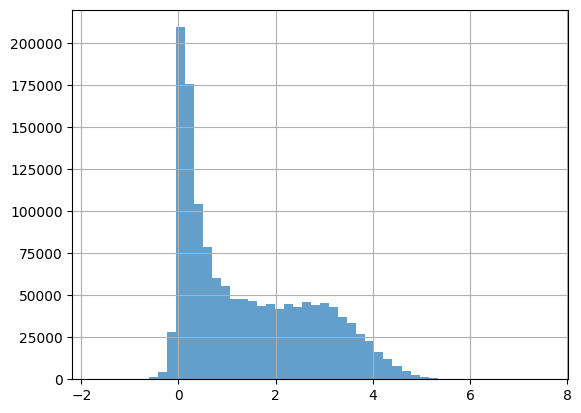

In [8]:
data['total_et'].hist(bins=50, alpha=0.7)

The "total_et" attribute represents the total evapotranspiration. In natural environments, especially during times when there is no vegetation or during periods of dormancy in vegetation, 0 values can be expected.

Finally, we will check if there are periods with extraordinary many 0 values in the data. We do this with a rolling window of 365 days and look for 30 0-values or more.

In [9]:
zero_values = data.eq(0).rolling(365).sum()
zero_values[zero_values > 30].dropna()

,,,MM,DD,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,10m_wind_u,10m_wind_v,...,swe,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4
location,YYYY,DOY,,,,,,,,,,,,,,,,,,,,,


As this is not the case, we conclude that all 0-values in the dataset occur naturally. Therefore, we will not remove them.

### 3. Statistical Analysis

We had already a first look into the distribution of the datasets. As a next step we want to get a better understanding of the key statistics and the correlations of the data attributes

In [10]:
data.iloc[:, 2:13].describe()

,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,10m_wind_u,10m_wind_v,fcst_alb,lai_high_veg,lai_low_veg
count,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06
mean,1.016285e+01,6.011266e+00,1.899017e+00,4.616621e+00,2.283953e+00,-2.210727e-01,4.429695e-01,4.652282e-02,2.397808e-01,2.493411e+00,1.886978e+00
std,9.103328e+00,8.615848e+00,8.301752e+00,7.864368e+00,8.085294e+00,8.560271e+00,1.487496e+00,1.125252e+00,1.488517e-01,9.446002e-01,7.504262e-01
min,-2.520000e+01,-3.000000e+01,-3.750000e+01,-3.520000e+01,-3.780000e+01,-4.260000e+01,-6.500000e+00,-8.000000e+00,7.000000e-02,7.000000e-01,3.000000e-01
25%,3.100000e+00,-2.000000e-01,-3.300000e+00,-8.000000e-01,-3.100000e+00,-5.600000e+00,-3.000000e-01,-6.000000e-01,1.400000e-01,1.700000e+00,1.300000e+00
50%,1.020000e+01,6.100000e+00,2.100000e+00,5.100000e+00,2.800000e+00,5.000000e-01,2.000000e-01,1.000000e-01,1.700000e-01,2.500000e+00,2.100000e+00
75%,1.730000e+01,1.280000e+01,8.300000e+00,1.080000e+01,8.600000e+00,6.400000e+00,1.100000e+00,7.000000e-01,3.500000e-01,3.200000e+00,2.500000e+00
max,3.690000e+01,2.970000e+01,2.420000e+01,2.430000e+01,2.110000e+01,2.000000e+01,8.900000e+00,7.400000e+00,8.400000e-01,4.900000e+00,3.300000e+00


Temperature has its minimum at -37°C and maximum at +37°C, with a mean of +6.2°C. Average wind speed is a bit higher towards east 0.42 m/s compared to north 0.06 m/s, where also the maximum wind speed was measured at 8.9 m/s in eastern direction.

In [11]:
data.iloc[:, 13:].describe()

,swe,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4
count,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06,1.424400e+06
mean,1.611395e+02,3.702651e+02,1.092048e+02,8.165145e+01,4.927161e+01,9.071267e+04,1.432721e+00,3.330740e+00,3.612044e-01,3.858512e-01
std,6.095234e+02,1.947385e+02,7.148140e+01,2.691885e+01,2.226359e+01,6.226311e+03,1.313262e+00,5.548652e+00,5.557345e-02,5.029208e-02
min,0.000000e+00,3.000000e+00,0.000000e+00,-2.000000e+01,-3.400000e+01,7.223900e+04,-1.720000e+00,0.000000e+00,1.200000e-01,2.200000e-01
25%,0.000000e+00,1.980000e+02,4.500000e+01,6.400000e+01,3.300000e+01,8.576400e+04,2.400000e-01,4.000000e-02,3.300000e-01,3.600000e-01
50%,2.600000e-01,3.560000e+02,9.600000e+01,8.400000e+01,5.000000e+01,9.336900e+04,1.040000e+00,8.900000e-01,3.700000e-01,3.900000e-01
75%,4.423000e+01,5.380000e+02,1.680000e+02,1.010000e+02,6.600000e+01,9.546900e+04,2.500000e+00,4.370000e+00,3.900000e-01,4.100000e-01
max,5.173980e+03,8.540000e+02,3.100000e+02,1.840000e+02,1.190000e+02,1.012320e+05,7.560000e+00,1.185600e+02,6.700000e-01,6.700000e-01


The target variable 'prec', representing the total amount of precipitation, hexhibits a mean value of $3.57$ mm, a maximum value of $125.27$ mm, and a minimum of $0$ mm, as obviously there are days without precipitation. In general, there seems to be quite a large range of recorded precipitation values.

(The variables 'volsw_123' and 'volsw_4', representing the fraction of water in the topsoil and subsoil layers respectively, exhibit similar statistics. The mean values are $0.36 m^3m^{-3}$ for 'volsw_123' and $0.39 m^3m^{-3}$ for 'volsw_4'. Both variables have a maximum value of $0.52 m^3m^{-3}$, which appears to be the maximum water-holding capacity of the soil in these examples. The minimum values are $0.11 m^3m^{-3}$ for the topsoil layer ('volsw_123') and $0.21 m^3m^{-3}$ for the subsoil layer ('volsw_4'), suggesting that the topsoil layer dries out more quickly.)

All values above, especially the minimum and maximum values seem to be in a reasonable range. Therefore, no outlier removal will be necessary.

As a next step, we want to investigate if and to what extend the different data attributes correlate with each other.

Pairs with correlation >= 0.8:
1. 2m_temp_max and 2m_temp_mean: 0.98
2. 2m_temp_max and 2m_temp_min: 0.93
3. 2m_temp_max and 2m_dp_temp_max: 0.95
4. 2m_temp_max and 2m_dp_temp_mean: 0.93
5. 2m_temp_max and 2m_dp_temp_min: 0.9
6. 2m_temp_max and total_et: 0.84
7. 2m_temp_mean and 2m_temp_min: 0.97
8. 2m_temp_mean and 2m_dp_temp_max: 0.97
9. 2m_temp_mean and 2m_dp_temp_mean: 0.97
10. 2m_temp_mean and 2m_dp_temp_min: 0.95
11. 2m_temp_mean and total_et: 0.83
12. 2m_temp_min and 2m_dp_temp_max: 0.95
13. 2m_temp_min and 2m_dp_temp_mean: 0.97
14. 2m_temp_min and 2m_dp_temp_min: 0.98
15. 2m_dp_temp_max and 2m_dp_temp_mean: 0.99
16. 2m_dp_temp_max and 2m_dp_temp_min: 0.96
17. 2m_dp_temp_mean and 2m_dp_temp_min: 0.99
18. surf_net_solar_rad_max and surf_net_solar_rad_mean: 0.98
19. surf_net_solar_rad_max and total_et: 0.84
20. surf_net_solar_rad_mean and total_et: 0.87
21. surf_net_therm_rad_max and surf_net_therm_rad_mean: 0.93
22. volsw_123 and volsw_4: 0.82


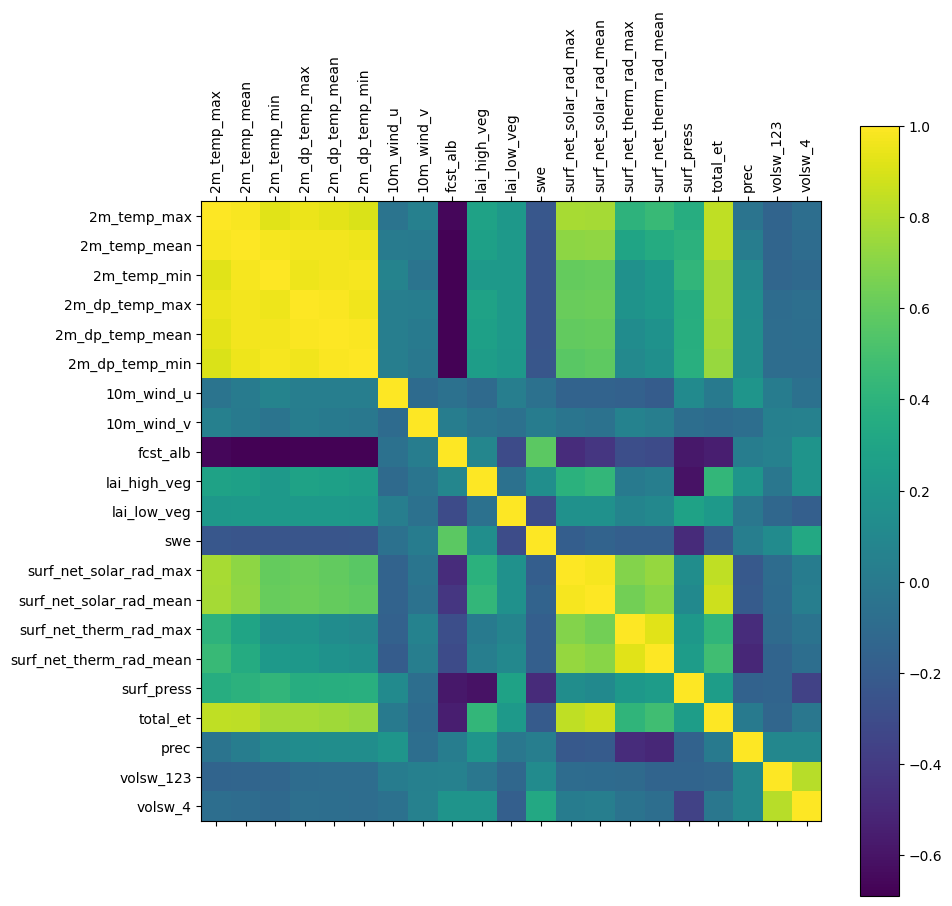

In [12]:
corr = data.iloc[:, 2:].corr()

k=1
print("Pairs with correlation >= 0.8:")
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i, j] >= 0.8:
            print(f"{k}. {corr.columns[i]} and {corr.columns[j]}: {round(corr.iloc[i, j], 2)}")
            k += 1

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr)
fig.colorbar(cax)
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
plt.show()


Well, it is not really surprising that the 6 temperature variables show a very high correlation as well as the 4 solar/thermal radiation attributes. Apart from that, the data attributes aren't especially high correlated. The **Forecast Albedo** shares a negative correlation with many data attributes. The target variables are highly correlated with each other, but not with other variables. This highlights the importance for a feature importance study in this context, which will be carried out at a later stage in the project.

### 4. Data Preprocessing

As we saw during our data exploration there are no missing values, outliers or other suspicious values in the dataset. To finish the preprocessing phase we will standardize the data, as this might be beneficial for the output of our models and split the data into a train, validation and test set.

We have time dependent data of the years 1981 to 2019. We will use the last 3 years 2017-2019 for testing and 2014-2016 as the validation data.

In [13]:
data = data.astype({col: 'float64' for col in data.select_dtypes('int64').columns})
data.reset_index(inplace=True)

In [14]:
test_data = data[data['YYYY'] >= 2017]
validation_data = data[(data['YYYY'] >= 2014) & (data['YYYY'] < 2017)]
train_data = data[data['YYYY'] < 2014]

In [15]:
scaler = StandardScaler()
scaler.fit(train_data.iloc[:, 5:])

train_data.iloc[:, 5:] = scaler.transform(train_data.iloc[:, 5:])
validation_data.iloc[:, 5:] = scaler.transform(validation_data.iloc[:, 5:])
test_data.iloc[:, 5:] = scaler.transform(test_data.iloc[:, 5:])

In [16]:
train_data.head()

,location,YYYY,DOY,MM,DD,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,...,swe,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4
0,ID_825,1981,1,1.0,1.0,-0.874208,-0.730781,-0.574451,-0.637935,-0.663565,...,-0.256118,-1.225177,-1.218362,-0.246297,-0.459779,0.380145,-0.456391,0.245055,0.695167,0.07279
1,ID_825,1981,2,1.0,2.0,-1.170327,-0.973804,-0.646350,-0.764178,-0.872210,...,-0.251426,-1.168442,-1.176166,-0.209042,-0.459779,0.411612,-0.839019,0.506381,0.513727,0.07279
2,ID_825,1981,3,1.0,3.0,-0.786469,-0.510903,-0.262887,-0.410697,-0.221729,...,-0.238254,-1.591373,-1.387147,-1.065897,-1.673402,0.183636,-0.946155,1.991434,0.513727,0.07279
3,ID_825,1981,4,1.0,4.0,-1.049686,-0.753926,-0.502551,-0.713680,-0.504013,...,-0.236728,-1.446958,-1.288689,-0.358060,-0.504728,0.179462,-0.877282,0.205406,0.695167,0.07279
4,ID_825,1981,5,1.0,5.0,-1.378706,-1.251544,-0.993863,-1.029288,-1.068581,...,-0.233316,-1.596531,-1.359016,-0.395315,-0.594626,0.292326,-0.984418,-0.252365,0.695167,0.07279


### 5. Discussing Data Quality & Engineering

Understanding data quality and performing data engineering are probably the most important steps before model training. High-quality data ensures that the models are trained on accurate and relevant information, leading to better performance and more reliable predictions. Quality is more important than quantity in most cases. 
When it comes to data quality we want to ensure there are no missing or invalid values, since they could lead to biased models or incorrect predictions. The data should be consistent and accurately represent the real-world scenario that it is intended to model, as it is the case for our data here.
With data engineering we want to help the model to stay on track. Crucial steps are for example outlier removal or data normalization/standardization as performed above. This is especially important for algorithms that are sensitive to feature scales to assure that all features contribute equally to the model training process. We also split the data into training, validation and test sets to ensure that the model is evaluated on unseen data to provide a realisitc estimate of its performance.
By addressing these aspects of data quality and engineering, we can ensure that the models are trained on reliable and meaningful data, leading to better generalization and more accurate predictions.

### 6. Save the data

In [17]:
os.makedirs("../data/processed", exist_ok=True)

train_data.to_csv("../data/processed/train_data.csv", index=False)
validation_data.to_csv("../data/processed/validation_data.csv", index=False)
test_data.to_csv("../data/processed/test_data.csv", index=False)